In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:

import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
import cv2
print(cv2.__version__)



4.11.0


In [ ]:
# Paths
base_dir = "ARCHIVE(1)/chest_xray/chest_xray"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

In [ ]:
# Paths
base_dir = "ARCHIVE(1)/chest_xray/chest_xray"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

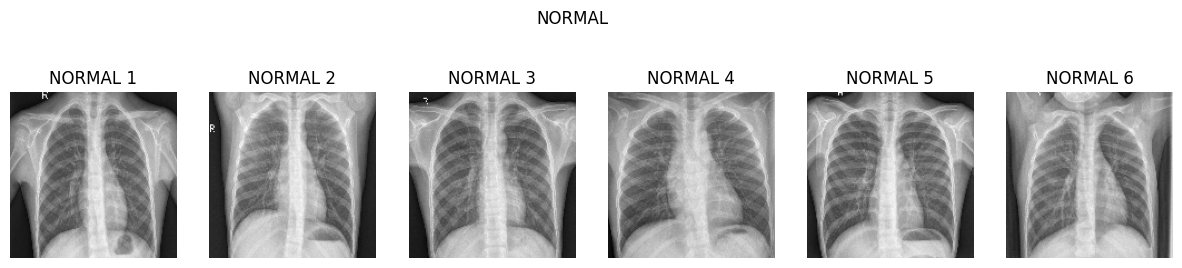

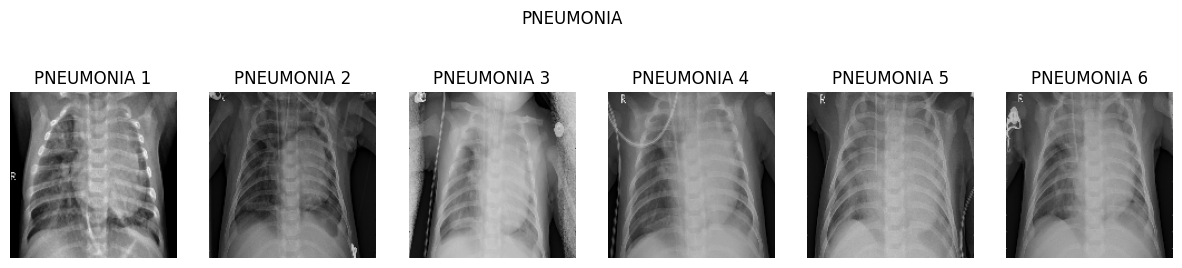

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2

# Define the base path where the dataset is located
base_dir = r"c:\Users\Fidha\OneDrive\Desktop\Documents\archive(1)\chest_xray"

# Define the test directory (relative to base directory)
test_dir = os.path.join(base_dir, "chest_xray", "test")

# Define the categories (subfolders in the test directory)
categories = ["NORMAL", "PNEUMONIA"]

# Display 6 images from each category
for category in categories:
    # Path to the category folder
    category_path = os.path.join(test_dir, category)

    if not os.path.exists(category_path):
        print(f"Error: '{category}' folder is missing.")
        continue  # Skip if the folder doesn't exist

    # Get the list of images in the category folder
    images = os.listdir(category_path)[:6]  # Limit to first 6 images

    # Create a subplot to display images
    plt.figure(figsize=(15, 6))  # Set figure size

    for i, img_name in enumerate(images):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Read the image in color
        img = cv2.resize(img, (150, 150))  # Resize image to 150x150

        # Display the image in a subplot
        plt.subplot(2, 6, i + 1)  # 2 rows, 6 columns
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for correct display
        plt.title(f"{category} {i + 1}")
        plt.axis("off")

    # Add a title for the entire category
    plt.suptitle(f"{category}")
    plt.show()


In [ ]:
import os

# Get the current working directory
current_path = os.getcwd()

print(f"Current working directory: {current_path}")


Current working directory: c:\Users\Fidha\OneDrive\Desktop\Documents\archive(1)\chest_xray


In [ ]:
# Relative path to the 'test' folder from the current working directory
test_dir = os.path.join(os.getcwd(), "chest_xray", "test")


In [ ]:
import os

base_dir = r"c:\Users\Fidha\OneDrive\Desktop\Documents\archive(1)\chest_xray\chest_xray"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

print("Train batch shape:", train_data[0][0].shape)
print("Val batch shape:", val_data[0][0].shape)
print("Test batch shape:", test_data[0][0].shape)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Train batch shape: (32, 150, 150, 3)
Val batch shape: (16, 150, 150, 3)
Test batch shape: (32, 150, 150, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


C:\Users\Fidha\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# You can adjust epochs for better performance
history = model.fit(
    train_data,
    epochs=50,
    validation_data=val_data
)



C:\Users\Fidha\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 491ms/step - accuracy: 0.7718 - loss: 0.5115 - val_accuracy: 0.8750 - val_loss: 0.3896
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 76s 464ms/step - accuracy: 0.8784 - loss: 0.2826 - val_accuracy: 0.6875 - val_loss: 0.7942
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 75s 462ms/step - accuracy: 0.8969 - loss: 0.2517 - val_accuracy: 0.6875 - val_loss: 0.7103
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 74s 452ms/step - accuracy: 0.9173 - loss: 0.2147 - val_accuracy: 0.8125 - val_loss: 0.6761
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 74s 450ms/step - accuracy: 0.9161 - loss: 0.2000 - val_accuracy: 0.8125 - val_loss: 0.5422
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 74s 453ms/step - accuracy: 0.9222 - loss: 0.1933 - val_accuracy: 0.8750 - val_loss: 0.4652
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 2902s 18s/step - accuracy: 0.9431 - loss: 0.1490 - val_accuracy: 0.6250 - val_loss: 1.0676
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 85s 518ms/step - accuracy: 0.9473 - loss: 0

In [ ]:
# Get final training accuracy
final_train_acc = history.history['accuracy'][-1] * 100

# Get final validation accuracy
final_val_acc = history.history['val_accuracy'][-1] * 100

# Print the results
print(f"Final Training Accuracy: {final_train_acc:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc:.2f}%")


Final Training Accuracy: 97.62%
Final Validation Accuracy: 81.25%


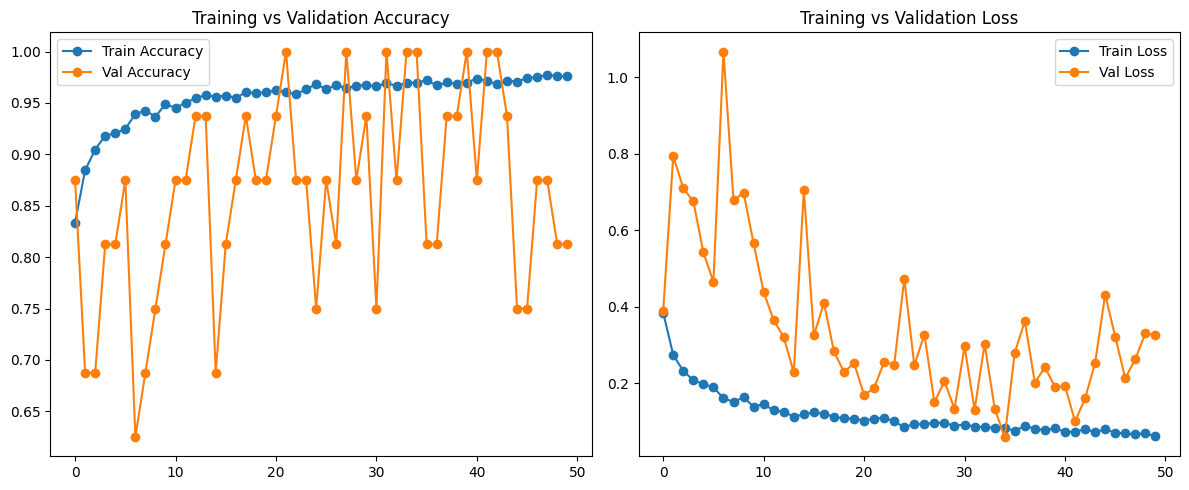

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step


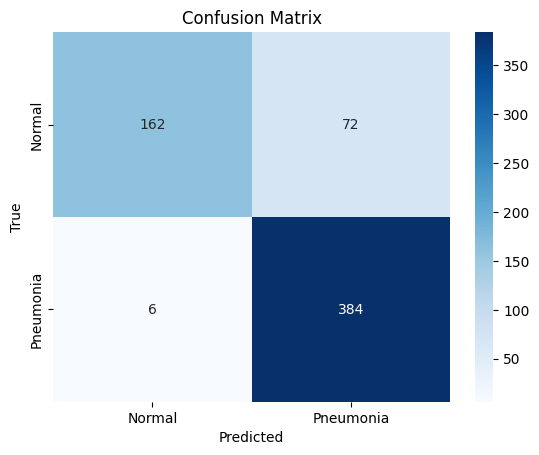

              precision    recall  f1-score   support

      Normal       0.96      0.69      0.81       234
   Pneumonia       0.84      0.98      0.91       390

    accuracy                           0.88       624
   macro avg       0.90      0.84      0.86       624
weighted avg       0.89      0.88      0.87       624



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get true labels and predicted labels
y_true = test_data.classes
y_pred = (model.predict(test_data) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=["Normal", "Pneumonia"]))



In [ ]:
# Final accuracy and loss
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print("\nFinal Training Accuracy: {:.2f}%".format(final_train_acc * 100))
print("Final Validation Accuracy: {:.2f}%".format(final_val_acc * 100))
print("Final Training Loss: {:.4f}".format(final_train_loss))
print("Final Validation Loss: {:.4f}".format(final_val_loss))

# Overfitting Check
if final_train_acc - final_val_acc > 0.05:
    print("\n Possible Overfitting: Training accuracy is much higher than validation accuracy.")
elif final_val_acc > final_train_acc:
    print("\n Great Generalization: Validation accuracy is slightly better than training accuracy.")
else:
    print("\n Model performance looks balanced.")



Final Training Accuracy: 97.62%
Final Validation Accuracy: 81.25%
Final Training Loss: 0.0615
Final Validation Loss: 0.3252

 Possible Overfitting: Training accuracy is much higher than validation accuracy.


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step


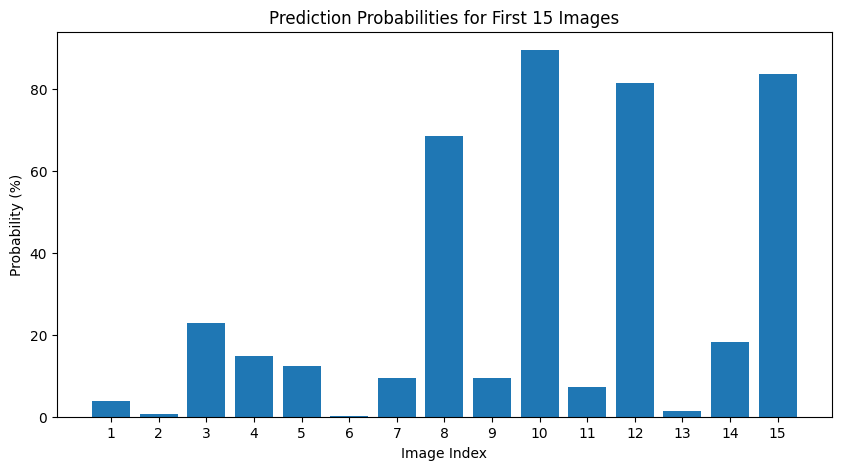

In [ ]:
import numpy as np

# Get prediction probabilities
probabilities = model.predict(test_data)

# Convert probabilities to percentage
probabilities_percent = probabilities * 100

# Plot first 15 prediction probabilities
plt.figure(figsize=(10, 5))
plt.bar(range(15), probabilities_percent[:15].flatten())
plt.title('Prediction Probabilities for First 15 Images')
plt.xlabel('Image Index')
plt.ylabel('Probability (%)')
plt.xticks(range(15), range(1, 16))  # Image numbers
plt.show()


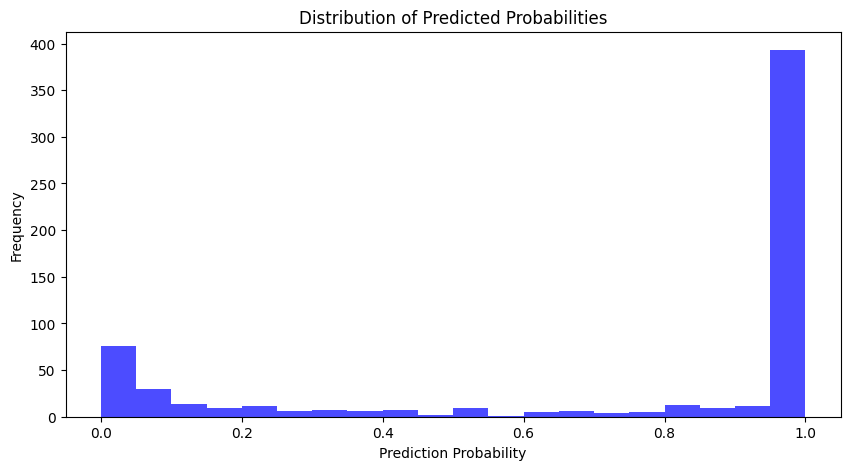

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(probabilities.flatten(), bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Prediction Probability')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Save the trained model
model.save('pneumonia_classifier_model.h5')
print("\n✅ Model saved as 'pneumonia_classifier_model.h5'")



✅ Model saved as 'pneumonia_classifier_model.h5'
